# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

##Three Observable Trends Based on Data
1. Latitude and max temperature are correlated - latitude of 20 yields the highest temperatures in the northern hemisphere, a negative correlation.
2. Latitude between 20-30 yields the lowest humidity percentages in the northern hemisphere.
3. The Cloudiness vs latitude scatter plot showed no trend 

In [1]:
!pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as stats
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"

query_url = f"{url}appid={weather_api_key}&units={units}&q="

city_group=[]
lat=[]
lng=[]
max_temp =[]
cloud=[]
hum=[]
wind=[]
country=[]
date=[]


#Loop through the list of cities 

print("Beginning Data Retrieval\n-----------------------------------------")

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        max_temp.append(response['main']['temp_max'])
        city_group.append(response['name'])
        print(f"Processing Record {cities.index(city)} of set 1 | {city}")
        
    except(KeyError, IndexError):
        print("Missing field/result....skipping.")
    
print("-----------------------------------\nData Retrieval Complete\n------------------------")
        


Beginning Data Retrieval
-----------------------------------------
Missing field/result....skipping.
Processing Record 1 of set 1 | manicore
Processing Record 2 of set 1 | mount gambier
Processing Record 3 of set 1 | sal rei
Missing field/result....skipping.
Processing Record 5 of set 1 | ushuaia
Processing Record 6 of set 1 | ixtapa
Processing Record 7 of set 1 | eyrarbakki
Processing Record 8 of set 1 | makaha
Processing Record 9 of set 1 | chokurdakh
Processing Record 10 of set 1 | clyde river
Processing Record 11 of set 1 | mataura
Processing Record 12 of set 1 | busselton
Processing Record 13 of set 1 | cidreira
Processing Record 14 of set 1 | ketchikan
Processing Record 15 of set 1 | huarmey
Processing Record 16 of set 1 | bluff
Processing Record 17 of set 1 | itarema
Processing Record 18 of set 1 | port elizabeth
Processing Record 19 of set 1 | barrow
Processing Record 20 of set 1 | chicama
Processing Record 21 of set 1 | albany
Processing Record 22 of set 1 | siofok
Processing 

Processing Record 198 of set 1 | chuy
Processing Record 199 of set 1 | deputatskiy
Processing Record 200 of set 1 | los llanos de aridane
Processing Record 201 of set 1 | sarangani
Processing Record 202 of set 1 | tual
Processing Record 203 of set 1 | gazanjyk
Processing Record 204 of set 1 | upernavik
Processing Record 205 of set 1 | baoding
Processing Record 206 of set 1 | hasaki
Processing Record 207 of set 1 | lesozavodsk
Processing Record 208 of set 1 | teguldet
Processing Record 209 of set 1 | maun
Missing field/result....skipping.
Processing Record 211 of set 1 | pangody
Processing Record 212 of set 1 | yaan
Processing Record 213 of set 1 | limbang
Processing Record 214 of set 1 | nanakuli
Processing Record 215 of set 1 | axim
Processing Record 216 of set 1 | madang
Processing Record 217 of set 1 | port-gentil
Processing Record 218 of set 1 | gat
Processing Record 219 of set 1 | poum
Missing field/result....skipping.
Processing Record 221 of set 1 | itoman
Processing Record 222 

Processing Record 592 of set 1 | vila
Processing Record 593 of set 1 | wonthaggi
Processing Record 594 of set 1 | kaeo
Processing Record 595 of set 1 | ardakan
Processing Record 596 of set 1 | aksay
Processing Record 597 of set 1 | chokwe
Processing Record 598 of set 1 | uspenka
Processing Record 599 of set 1 | uyo
Processing Record 600 of set 1 | namibe
Processing Record 601 of set 1 | matagami
Processing Record 602 of set 1 | port blair
Processing Record 603 of set 1 | san luis
Processing Record 604 of set 1 | diego de almagro
Processing Record 605 of set 1 | tessalit
Processing Record 606 of set 1 | portobelo
Processing Record 607 of set 1 | jardim
-----------------------------------
Data Retrieval Complete
------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_dict = {
    "City": city_group,
    "Lat": lat,
    "Lng":lng,
    "Max temp":max_temp,
    "Humidity":hum,
    "Cloudiness":cloud,
    "Wind speed": wind, 
    "Country":country,
    "Date":date}


In [6]:
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Manicoré,-5.81,-61.30,87.8,62,20,2.24,BR,1595536103
1,Mount Gambier,-37.83,140.77,37.4,86,99,6.93,AU,1595536103
2,Sal Rei,16.18,-22.92,78.8,78,90,16.11,CV,1595536049
3,Ushuaia,-54.80,-68.30,41.0,65,75,4.70,AR,1595536104
4,Ixtapa,20.70,-105.20,90.0,74,75,11.41,MX,1595536104


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [13]:
clean_data = weather_data[weather_data["Humidity"] > 100]
clean_data 

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date


In [15]:
#  Get the indices of cities that have humidity over 100%.
indices = weather_data.index[weather_data['Humidity'] > 100].tolist()
indices


[]

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [17]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv
weather_data.to_csv(r'out.csv', index=False)


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

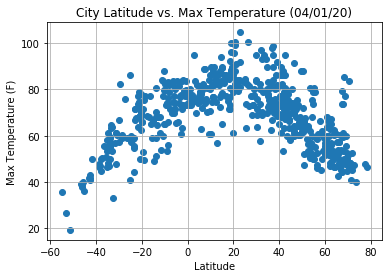

<Figure size 432x288 with 0 Axes>

In [41]:
x_values = weather_data['Lat']
y_values = weather_data['Max temp']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Max Temperature (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("City Lat vs Max temp.png")

A majority of the cities have a max temp between 70-90 degrees.

## Latitude vs. Humidity Plot

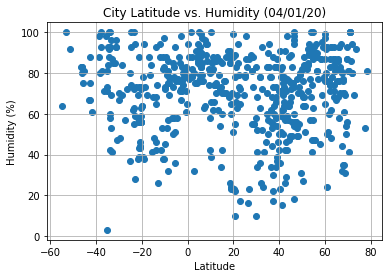

<Figure size 432x288 with 0 Axes>

In [42]:
x_values = weather_data['Lat']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Humidity (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Hum.png")

These cities have a wide range in humidity levels but most of them seem to have higher humidity levels.

## Latitude vs. Cloudiness Plot

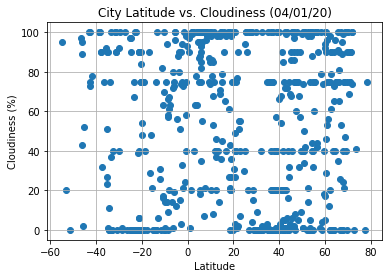

<Figure size 432x288 with 0 Axes>

In [43]:
x_values = weather_data['Lat']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Cloudiness (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Cloudiness.png")

Latitude and cloudiness do not seem to have a trend and there are some cities that see 0% of clouds.

## Latitude vs. Wind Speed Plot

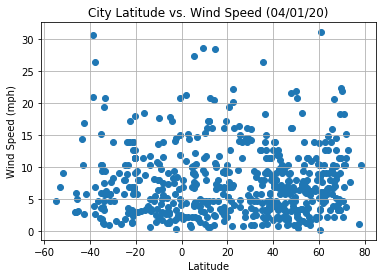

<Figure size 432x288 with 0 Axes>

In [44]:
x_values = weather_data['Lat']
y_values = weather_data['Wind speed']
plt.scatter(x_values,y_values)
plt.title('City Latitude vs. Wind Speed (04/01/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()
plt.tight_layout()
plt.savefig("Lat vs Wind Speed.png")

A majority of the cities have a lower wind speed of about 5-10 mph

## Linear Regression

In [18]:
# OPTIONAL: Create a function to create Linear Regression plots


In [19]:
# Create Northern and Southern Hemisphere DataFrames
southern_hemisphere = weather_data[weather_data["Lat"] < 0]
northern_hemisphere = weather_data[weather_data["Lat"] > 0]

In [20]:
#southern hemisphere df
southern_hemisphere

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
0,Manicoré,-5.81,-61.30,87.80,62,20,2.24,BR,1595536103
1,Mount Gambier,-37.83,140.77,37.40,86,99,6.93,AU,1595536103
3,Ushuaia,-54.80,-68.30,41.00,65,75,4.70,AR,1595536104
9,Mataura,-46.19,168.86,39.00,83,68,3.00,NZ,1595536105
10,Busselton,-33.65,115.33,44.01,76,0,4.29,AU,1595536105
...,...,...,...,...,...,...,...,...,...
546,Chokwé,-24.53,32.98,65.17,58,91,5.10,MZ,1595535999
549,Mossamedes,-15.20,12.15,67.68,76,1,5.08,AO,1595536244
552,San Luis,-33.30,-66.34,38.21,76,98,11.81,AR,1595536246
553,Diego de Almagro,-26.37,-70.05,55.71,37,0,9.71,CL,1595536246


In [21]:
#northern hemisphere df
northern_hemisphere

,City,Lat,Lng,Max temp,Humidity,Cloudiness,Wind speed,Country,Date
2,Sal Rei,16.18,-22.92,78.80,78,90,16.11,CV,1595536049
4,Ixtapa,20.70,-105.20,90.00,74,75,11.41,MX,1595536104
5,Eyrarbakki,63.86,-21.15,57.00,58,20,13.87,IS,1595536104
6,Makaha,21.47,-158.22,84.20,61,40,5.82,US,1595536104
7,Chokurdakh,70.63,147.92,68.07,59,54,5.48,RU,1595536104
...,...,...,...,...,...,...,...,...,...
548,Uyo,5.03,7.93,72.86,96,100,3.11,NG,1595536243
550,Matagami,49.75,-77.63,78.80,31,1,3.15,CA,1595536245
551,Port Blair,11.67,92.75,81.61,73,72,3.33,IN,1595536245
554,Tessalit,20.20,1.01,93.85,24,38,3.06,ML,1595536247


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5105212774575429


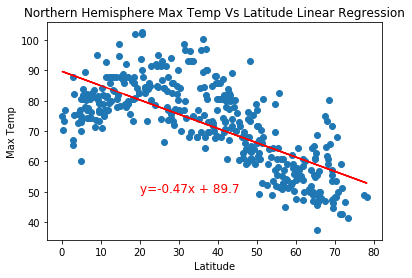

<Figure size 432x288 with 0 Axes>

In [22]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Northern Max temp vs lat linear reg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.6139628044890607


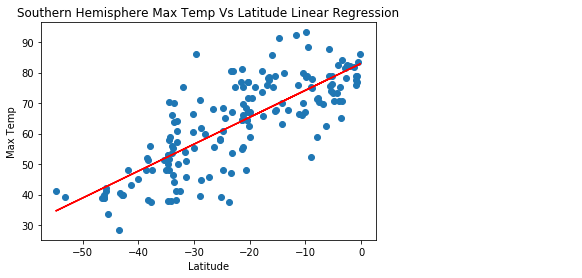

<Figure size 432x288 with 0 Axes>

In [23]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Max temp"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Max Temp Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()
plt.savefig("Southern Max temp vs lat linear reg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010629584159397186


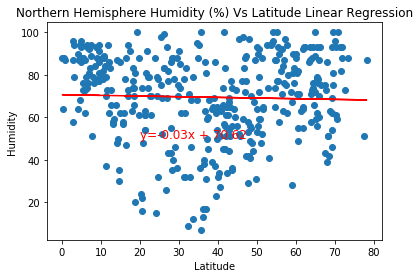

<Figure size 432x288 with 0 Axes>

In [24]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Humidity (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Northern Humidity vs lat linear reg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0014743980394925935


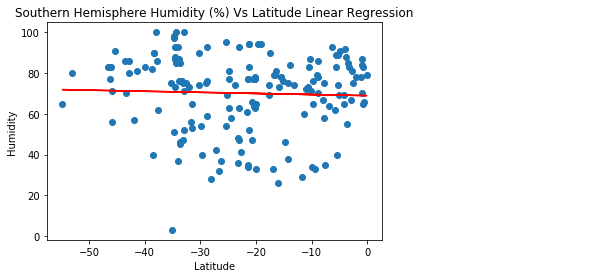

<Figure size 432x288 with 0 Axes>

In [25]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Humidity (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()
plt.savefig("Southern Humidity vs lat linear reg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0032969176029509044


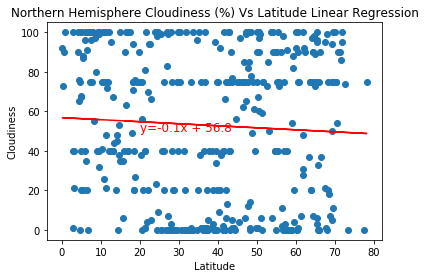

<Figure size 432x288 with 0 Axes>

In [26]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Cloudiness (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Northern Cloudiness vs lat linear reg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.04255522478060527


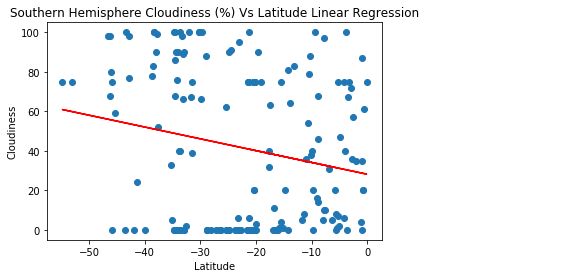

<Figure size 432x288 with 0 Axes>

In [27]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Cloudiness (%) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()
plt.savefig("Southern Cloudiness vs lat linear reg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.002062114250134323


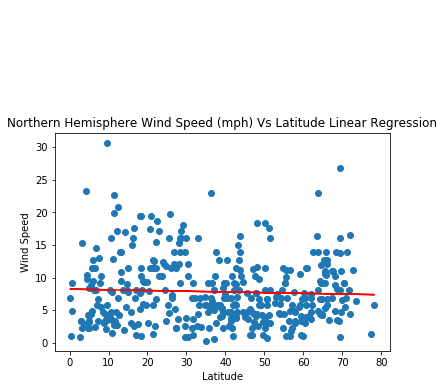

<Figure size 432x288 with 0 Axes>

In [28]:
# Create Plot
x_values_1 = northern_hemisphere["Lat"]
y_values_1 = northern_hemisphere["Wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
 
plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Northern Hemisphere Wind Speed (mph) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Northern Wind speed vs lat linear reg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.004332999927243675


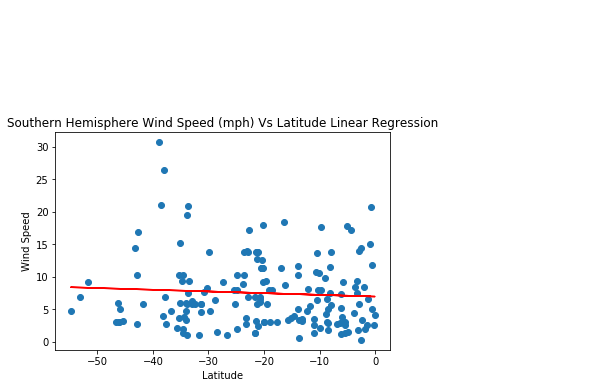

<Figure size 432x288 with 0 Axes>

In [52]:
# Create Plot
x_values_1 = southern_hemisphere["Lat"]
y_values_1 = southern_hemisphere["Wind speed"]
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values_1, y_values_1)
regress_values = x_values_1 * slope +intercept
line_equation = "y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values_1, y_values_1)
plt.plot(x_values_1, regress_values, "r-")
plt.annotate(line_equation, (20,50), fontsize=12,color="red")
print(f"The r-squared is: {rvalue**2}")
      
plt.title("Southern Hemisphere Wind Speed (mph) Vs Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()
plt.savefig("Southern Wind speed vs lat linear reg.png")